# Compare the correlations for same kOn_Target when rAdd is varying independently


In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import spearmanr
import re
from tqdm.notebook import tqdm

In [43]:
plt.rcParams['text.usetex'] = False

In [22]:
#Parameter sheet
parameter_sheet = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/sim_details/effect_of_radd_positive_new.csv', index_col=0)
folder_simulations = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_run_2/A_to_B_r_add/"
list_simulations = [file for file in os.listdir(folder_simulations)  if "df_" in file]
len(list_simulations)
parameter_sheet_median = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/sim_details/effect_of_radd_positive.csv', index_col=0)
folder_simulations_median = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/A_to_B_r_add/"
list_simulations_median = [file for file in os.listdir(folder_simulations_median)  if "df_" in file]
len(list_simulations_median)

34

In [25]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import spearmanr
from joblib import Parallel, delayed

t1 = 5
t2 = 15

def compute_correlations(file, folder):
    file_path = os.path.join(folder, file)
    simulation = pd.read_csv(file_path)
    
    t1_data = simulation[simulation['time_step'] == t1]
    t2_data = simulation[simulation['time_step'] == t2]
    mean_t1 = t1_data['gene_2_mRNA'].mean()
    mean_t2 = t2_data['gene_2_mRNA'].mean()
    t1_corr = spearmanr(t1_data['gene_1_mRNA'], t1_data['gene_2_mRNA'])
    t2_corr = spearmanr(t2_data['gene_1_mRNA'], t2_data['gene_2_mRNA'])
    match = re.search(r'row_(\d+)_(\d+)', file)
    if match:
        integers = list(map(int, match.groups()))
    index = max(np.array(integers))
    return {
        "index": index,
        t1: t1_corr,
        t2: t2_corr,
        "mean_t1": mean_t1,
        "mean_t2": mean_t2
    }

# Set number of workers
n_jobs = 4  # Use all cores, or set to a fixed number like 8

# Run in parallel
results = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations) for file in tqdm(list_simulations)
)

# Convert to DataFrame
corr_index_df_saturation = pd.DataFrame(results)

# Run in parallel
results_median = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations_median) for file in tqdm(list_simulations_median)
)

# Convert to DataFrame
corr_index_df_median = pd.DataFrame(results_median)


In [26]:
corr_index_df_median

,index,5,15,mean_t1,mean_t2
0,29,"(0.055107851163106944, 6.246581613868006e-15)","(0.054978764741024734, 7.2198366044112e-15)",5.24180,5.23695
1,51,"(0.07098791988709444, 9.069841852868363e-24)","(0.07002977452031366, 3.573223732860618e-23)",6.75690,6.75140
2,53,"(0.07979196380364467, 1.2884188296737643e-29)","(0.06564290094356044, 1.503509137087253e-20)",6.78230,6.77910
3,35,"(0.07199884432647159, 2.0923944100186755e-24)","(0.06590097955078256, 1.065065539349434e-20)",5.70805,5.71310
4,11,"(0.05346988391167312, 3.827545466321538e-14)","(0.04993162943903123, 1.6019503493864746e-12)",3.54715,3.53745
5,33,"(0.062296277599167636, 1.1648222388581828e-18)","(0.06733577308517615, 1.5288872621342581e-21)",5.55640,5.55965
6,37,"(0.06782744611960695, 7.78701586787854e-22)","(0.07015716637791378, 2.9809303123684335e-23)",5.84650,5.85005
7,31,"(0.07037407103904157, 2.187824097858727e-23)","(0.07138890872155494, 5.081783317188452e-24)",5.38325,5.39360
8,15,"(0.052360056968628034, 1.2682434278157965e-13)","(0.05721656046278016, 5.597499048811354e-16)",4.02730,4.01960
9,63,"(0.06072998843776052, 8.260405833082117e-18)","(0.06801062837623134, 6.048780949490546e-22)",7.26875,7.28925


In [37]:
corr_index_df_saturation

,index,5,15,mean_t1,mean_t2
0,29,"(0.055107851163106944, 6.246581613868006e-15)","(0.054978764741024734, 7.2198366044112e-15)",5.24180,5.23695
1,51,"(0.07098791988709444, 9.069841852868363e-24)","(0.07002977452031366, 3.573223732860618e-23)",6.75690,6.75140
2,53,"(0.07979196380364467, 1.2884188296737643e-29)","(0.06564290094356044, 1.503509137087253e-20)",6.78230,6.77910
3,35,"(0.07199884432647159, 2.0923944100186755e-24)","(0.06590097955078256, 1.065065539349434e-20)",5.70805,5.71310
4,11,"(0.05346988391167312, 3.827545466321538e-14)","(0.04993162943903123, 1.6019503493864746e-12)",3.54715,3.53745
5,33,"(0.062296277599167636, 1.1648222388581828e-18)","(0.06733577308517615, 1.5288872621342581e-21)",5.55640,5.55965
6,37,"(0.06782744611960695, 7.78701586787854e-22)","(0.07015716637791378, 2.9809303123684335e-23)",5.84650,5.85005
7,31,"(0.07037407103904157, 2.187824097858727e-23)","(0.07138890872155494, 5.081783317188452e-24)",5.38325,5.39360
8,15,"(0.052360056968628034, 1.2682434278157965e-13)","(0.05721656046278016, 5.597499048811354e-16)",4.02730,4.01960
9,63,"(0.06072998843776052, 8.260405833082117e-18)","(0.06801062837623134, 6.048780949490546e-22)",7.26875,7.28925


In [28]:
corr_index_df_saturation["index"] = corr_index_df_saturation["index"].astype(int)
corr_index_df_saturation.sort_values(by="index", inplace=True)
parameter_sheet['index'] = parameter_sheet.index 

corr_index_df_median["index"] = corr_index_df_median["index"].astype(int) + 1000
corr_index_df_median.sort_values(by="index", inplace=True)
parameter_sheet_median['index'] = parameter_sheet_median.index + 1000

In [29]:
df = pd.merge(corr_index_df_saturation, parameter_sheet, on=["index"])
df_median = pd.merge(corr_index_df_median, parameter_sheet_median, on=["index"])
df = pd.concat([df, df_median])

In [30]:
df

,index,5,15,mean_t1,mean_t2,p_on,p_off,mrna_half_life,protein_half_life,p_prod_mRNA,p_prod_protein,n_gene_1_to_gene_2,p_add_gene_1_to_gene_2,pair_id,gene_id
0,33,"(0.017536536070229224, 0.013135423448919856)","(0.017139401203261698, 0.015354668374412694)",7.59045,7.54355,0.55,1.375,5,45,2,500,2,2.0,16,2
1,35,"(0.01998853294141916, 0.0046999365118446995)","(0.030683803092357968, 1.4242070231770313e-05)",8.07185,8.06150,0.55,1.375,5,45,2,500,2,2.5,17,2
2,37,"(0.030377849820352982, 1.73281586347572e-05)","(0.029954031764746866, 2.2670203313065956e-05)",8.48235,8.51215,0.55,1.375,5,45,2,500,2,3.0,18,2
3,39,"(0.02679464843164207, 0.00015078134402941333)","(0.027298902579686365, 0.00011286565589258802)",8.91220,8.93625,0.55,1.375,5,45,2,500,2,3.5,19,2
4,41,"(0.019937999695119397, 0.004805913192099465)","(0.028498560472799524, 5.5570348096976365e-05)",9.25145,9.29145,0.55,1.375,5,45,2,500,2,4.0,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,1059,"(0.07893849013664593, 5.089497250296333e-29)","(0.06631424895019819, 6.115073900727166e-21)",7.14375,7.11790,0.55,8.080,5,45,2,500,2,16.5,29,2
30,1061,"(0.06944018842660844, 8.231667554609314e-23)","(0.0690782675335279, 1.3691891428809882e-22)",7.11420,7.14580,0.55,8.080,5,45,2,500,2,17.0,30,2
31,1063,"(0.06072998843776052, 8.260405833082117e-18)","(0.06801062837623134, 6.048780949490546e-22)",7.26875,7.28925,0.55,8.080,5,45,2,500,2,17.5,31,2
32,1065,"(0.07747340046551957, 5.199074845197665e-28)","(0.07437696281210751, 6.123734932441763e-26)",7.35395,7.38750,0.55,8.080,5,45,2,500,2,18.0,32,2


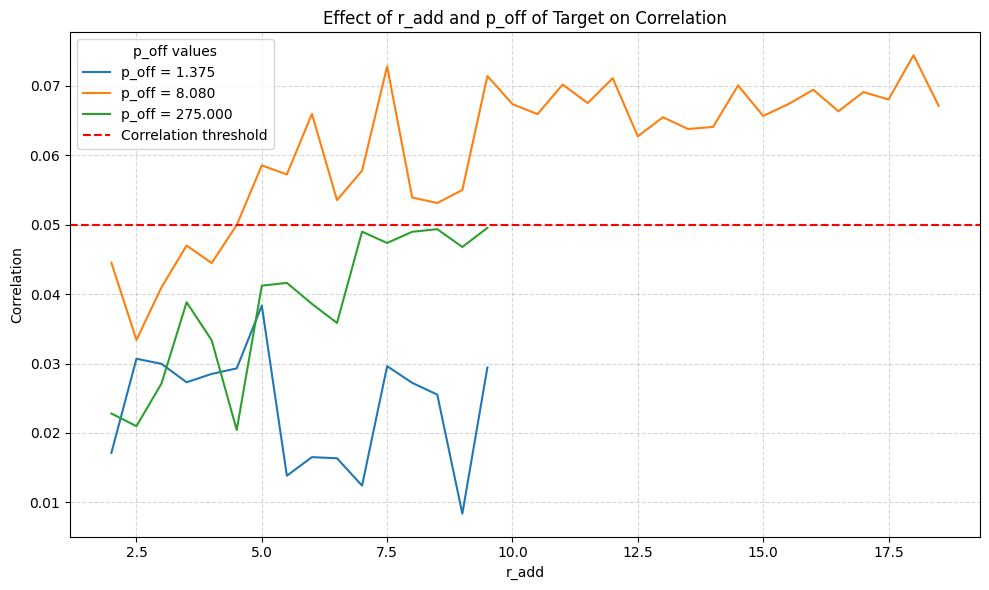

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique p_off values (k_on_Target)
k_on_values = np.sort(df['p_off'].unique())

# Pick 3 distinct colors manually
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Check to ensure you have exactly 3 unique values
if len(k_on_values) != 3:
    raise ValueError(f"Expected exactly 3 unique p_off values, got {len(k_on_values)}.")

# Plot each line with one of the 3 distinct colors
for idx, k_on in enumerate(k_on_values):
    subset = df[df['p_off'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    correlations = subset[15].apply(lambda x: x[0])  # Extract correlation
    
    ax.plot(subset['p_add_gene_1_to_gene_2'], correlations, 
            label=f'p_off = {k_on:.3f}', 
            color=colors[idx])

# Axis labels and title
ax.set_xlabel('r_add')
ax.set_ylabel('Correlation')
ax.set_title('Effect of r_add and p_off of Target on Correlation')
ax.grid(True, linestyle='--', alpha=0.5)
ax.axhline(0.05, color='red', label='Correlation threshold', linestyle='--')

plt.legend(title='p_off values')
plt.tight_layout()
plt.show()


Plotted line for p_off = 1.375
Plotted line for p_off = 8.080
Plotted line for p_off = 275.000


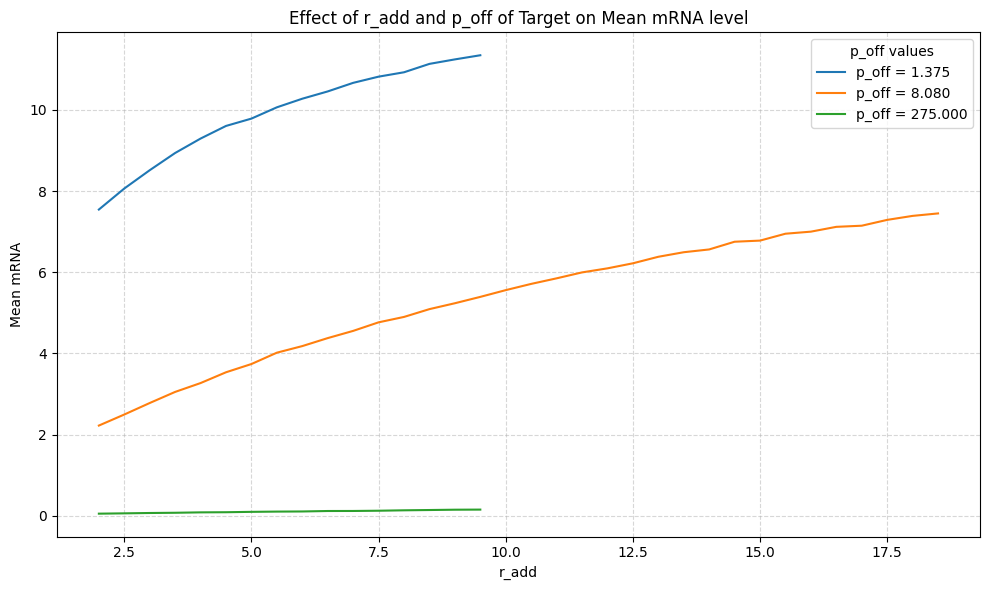

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique p_off values
k_on_values = np.sort(df['p_off'].unique())

# Pick 3 distinct colors manually
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Safety check
if len(k_on_values) != 3:
    raise ValueError(f"Expected exactly 3 unique p_off values, got {len(k_on_values)}.")

# Plot each line with one of the 3 colors
for idx, k_on in enumerate(k_on_values):
    subset = df[df['p_off'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    mean_t1 = subset['mean_t2']
    
    ax.plot(subset['p_add_gene_1_to_gene_2'], mean_t1, 
            label=f'p_off = {k_on:.3f}', 
            color=colors[idx])
    print(f"Plotted line for p_off = {k_on:.3f}")

# Axis labels and title
ax.set_xlabel('r_add')
ax.set_ylabel('Mean mRNA')
ax.set_title('Effect of r_add and p_off of Target on Mean mRNA level')
ax.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='p_off values')
plt.tight_layout()
plt.show()


# Identify the effect of $r_{add}$ when calculated independently and as a function of $k_{off}$


In [2]:
#Parameter sheet
parameter_sheet_independent = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/sim_details/effect_of_r_add_sampling_independent.csv', index_col=0)
folder_simulations_independent = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/A_to_B_r_add_independent/"
list_simulations_independent = [file for file in os.listdir(folder_simulations_independent)  if "df_" in file and "test" not in file]
print(len(list_simulations_independent))
parameter_sheet_dependent = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/sim_details/effect_of_r_add_sampling_dependent.csv', index_col=0)
folder_simulations_dependent = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/A_to_B_r_add_dependent/"
list_simulations_dependent = [file for file in os.listdir(folder_simulations_dependent)  if "df_" in file and "test" not in file]
len(list_simulations_dependent)

101


104

In [3]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import spearmanr
from joblib import Parallel, delayed

t1 = 5
t2 = 10

def compute_diff_correlation_vectorized(rep1_tf, rep1_target, rep2_tf, rep2_target):
    """
    Computes spearman correlation between the difference of TF and Target between the two replicates.

    Arguments:
        rep1_tf (pd.series): Values of TF in replicate 1
        rep1_target (pd.series): Values of Target in replicate 1
        rep2_tf (pd.series): Values of TF in replicate 2
        rep2_target (pd.series): Values of Target in replicate 2

    Returns:
        float: Spearman correlation between -1 and 1 or np.nan if there were less than 3 points to calculate.

    """
    try:
        diff_tf = rep1_tf - rep2_tf
        diff_target = rep1_target - rep2_target
        if len(diff_tf) < 3:
            return np.nan
        return spearmanr(diff_tf, diff_target)[0]
    except:
        return np.nan

def compute_correlations(file, folder):
    file_path = os.path.join(folder, file)
    simulation = pd.read_csv(file_path)
    t1_data = simulation[simulation['time_step'] == t1]
    t2_data = simulation[simulation['time_step'] == t2]
    replicates = t1_data['replicate'].values
    mean_t1 = t1_data['gene_2_mRNA'].mean()
    mean_t2 = t2_data['gene_2_mRNA'].mean()
    t1_corr = spearmanr(t1_data[t1_data['replicate'] == 1]['gene_1_mRNA'], t1_data[t1_data['replicate'] == 1]['gene_2_mRNA'])[0]
    t2_corr = spearmanr(t2_data[t2_data['replicate'] == 1]['gene_1_mRNA'], t2_data[t2_data['replicate'] == 1]['gene_2_mRNA'])[0]
    gene_i = t1_data['gene_1_mRNA'].values
    gene_j = t1_data['gene_2_mRNA'].values
    rep1_mask = replicates == 1
    rep2_mask = replicates == 2
    gi_r1, gj_r1 = gene_i[rep1_mask], gene_j[rep1_mask]
    gi_r2, gj_r2 = gene_i[rep2_mask], gene_j[rep2_mask]
    min_len = min(len(gi_r1), len(gi_r2))
    gi_r1, gj_r1 = gi_r1[:min_len], gj_r1[:min_len]
    gi_r2, gj_r2 = gi_r2[:min_len], gj_r2[:min_len]
    twin_corr_t1 = compute_diff_correlation_vectorized(gi_r1, gj_r1, gi_r2, gj_r2)
    
    gene_i = t2_data['gene_1_mRNA'].values
    gene_j = t2_data['gene_2_mRNA'].values
    rep1_mask = replicates == 1
    rep2_mask = replicates == 2
    gi_r1, gj_r1 = gene_i[rep1_mask], gene_j[rep1_mask]
    gi_r2, gj_r2 = gene_i[rep2_mask], gene_j[rep2_mask]
    min_len = min(len(gi_r1), len(gi_r2))
    gi_r1, gj_r1 = gi_r1[:min_len], gj_r1[:min_len]
    gi_r2, gj_r2 = gi_r2[:min_len], gj_r2[:min_len]
    twin_corr_t2 = compute_diff_correlation_vectorized(gi_r1, gj_r1, gi_r2, gj_r2)
    match = re.search(r'row_(\d+)_(\d+)', file)
    if match:
        integers = list(map(int, match.groups()))
    index = max(np.array(integers))
    return {
        "index": index,
        t1: t1_corr,
        t2: t2_corr,
        "twin_t1": twin_corr_t1,
        "twin_t2": twin_corr_t2,
        "mean_t1": mean_t1,
        "mean_t2": mean_t2
    }

# Set number of workers
n_jobs = 8  # Use all cores, or set to a fixed number like 8

# Run in parallel
results_independent = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations_independent) for file in tqdm(list_simulations_independent)
)

# Convert to DataFrame
corr_index_df_independent= pd.DataFrame(results_independent)

# Run in parallel
results_dependent = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations_dependent) for file in tqdm(list_simulations_dependent)
)

# Convert to DataFrame
corr_index_df_dependent= pd.DataFrame(results_dependent)

100%|██████████| 104/104 [00:11<00:00,  9.40it/s]


In [4]:
corr_index_df_dependent["index"] = corr_index_df_dependent["index"].astype(int)
corr_index_df_dependent.sort_values(by="index", inplace=True)
parameter_sheet_dependent['index'] = parameter_sheet_dependent.index 

corr_index_df_independent["index"] = corr_index_df_independent["index"].astype(int) + 1000
corr_index_df_independent.sort_values(by="index", inplace=True)
parameter_sheet_independent['index'] = parameter_sheet_independent.index + 1000

In [5]:
df_dependent = pd.merge(corr_index_df_dependent, parameter_sheet_dependent, on=["index"])
df_independent = pd.merge(corr_index_df_independent, parameter_sheet_independent, on=["index"])
df = df_independent #pd.concat([df_dependent, df_independent])

In [75]:
df_dependent

,index,5,10,twin_t1,twin_t2,mean_t1,mean_t2,p_on,p_off,mrna_half_life,protein_half_life,p_prod_mRNA,p_prod_protein,n_gene_1_to_gene_2,p_add_gene_1_to_gene_2,pair_id,gene_id
0,1,0.008957,0.000629,-0.006999,-0.011411,2.37370,2.37085,0.01,0.132857,5,45,2,560,2,0.033214,0,2
1,3,0.009671,0.015136,-0.009744,-0.006439,2.93780,2.95540,0.01,0.132857,5,45,2,560,2,0.053973,1,2
2,7,0.006533,0.007921,-0.002024,0.011075,4.18985,4.18075,0.01,0.132857,5,45,2,560,2,0.095491,3,2
3,11,0.032763,0.021897,0.005056,0.002092,5.13975,5.11155,0.01,0.132857,5,45,2,560,2,0.137009,5,2
4,13,0.015561,0.017776,0.007702,0.004047,5.57205,5.48530,0.01,0.132857,5,45,2,560,2,0.157768,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,263,0.041997,0.053540,-0.014155,0.020554,5.09005,5.10130,3.00,39.857143,5,45,2,560,2,41.102679,131,2
100,265,0.054782,0.056705,0.004639,0.019295,5.49270,5.50595,3.00,39.857143,5,45,2,560,2,47.330357,132,2
101,267,0.062283,0.061296,0.000464,0.012606,5.84960,5.86925,3.00,39.857143,5,45,2,560,2,53.558036,133,2
102,267,0.071937,0.074288,0.003399,0.028035,5.85025,5.87040,3.00,39.857143,5,45,2,560,2,53.558036,133,2


In [36]:
df_independent

,index,5,15,mean_t1,mean_t2,p_on,p_off,mrna_half_life,protein_half_life,p_prod_mRNA,p_prod_protein,n_gene_1_to_gene_2,p_add_gene_1_to_gene_2,pair_id,gene_id
0,1001,"(0.010087873297302, 0.15369872806819931)","(0.02337556918759854, 0.0009462127803342016)",12.47720,12.43250,0.01,0.132857,5,45,2,560,2,2.0,0,2
1,1003,"(0.012049833725191026, 0.08837003207158811)","(0.013566764575332907, 0.05503515086953731)",13.05535,13.01755,0.01,0.132857,5,45,2,560,2,3.0,1,2
2,1007,"(0.018464474911254348, 0.00901906918675162)","(0.006196817688942766, 0.38085826894392216)",13.55840,13.61580,0.01,0.132857,5,45,2,560,2,5.0,3,2
3,1009,"(0.01502966465951919, 0.033544684623831145)","(0.011290991720531022, 0.11032402032491706)",13.74220,13.69060,0.01,0.132857,5,45,2,560,2,6.0,4,2
4,1011,"(0.001385753447277269, 0.8446391440306434)","(0.014088808592803903, 0.04632359540052735)",13.82805,13.81335,0.01,0.132857,5,45,2,560,2,7.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1261,"(0.02558781091919262, 0.00029571022429979876)","(0.03156860045716059, 7.995361384398274e-06)",1.84915,1.85730,3.00,39.857143,5,45,2,560,2,6.0,130,2
97,1263,"(0.031226825047811112, 1.0010754104397253e-05)","(0.043131793464368906, 1.046084617094424e-09)",1.95870,1.96985,3.00,39.857143,5,45,2,560,2,7.0,131,2
98,1265,"(0.04134882874269994, 4.923314199965267e-09)","(0.03954560425588935, 2.2134562311597592e-08)",2.08945,2.09600,3.00,39.857143,5,45,2,560,2,8.0,132,2
99,1267,"(0.03268391926956506, 3.7795558555310154e-06)","(0.028715429193379802, 4.874617978852436e-05)",2.19615,2.21335,3.00,39.857143,5,45,2,560,2,9.0,133,2


Plotted line for p_off = 0.133
Plotted line for p_off = 0.200
Plotted line for p_off = 0.300
Plotted line for p_off = 0.451
Plotted line for p_off = 0.678
Plotted line for p_off = 1.019
Plotted line for p_off = 2.301
Plotted line for p_off = 3.458
Plotted line for p_off = 5.198
Plotted line for p_off = 7.812
Plotted line for p_off = 11.741
Plotted line for p_off = 17.645
Plotted line for p_off = 26.520
Plotted line for p_off = 39.857


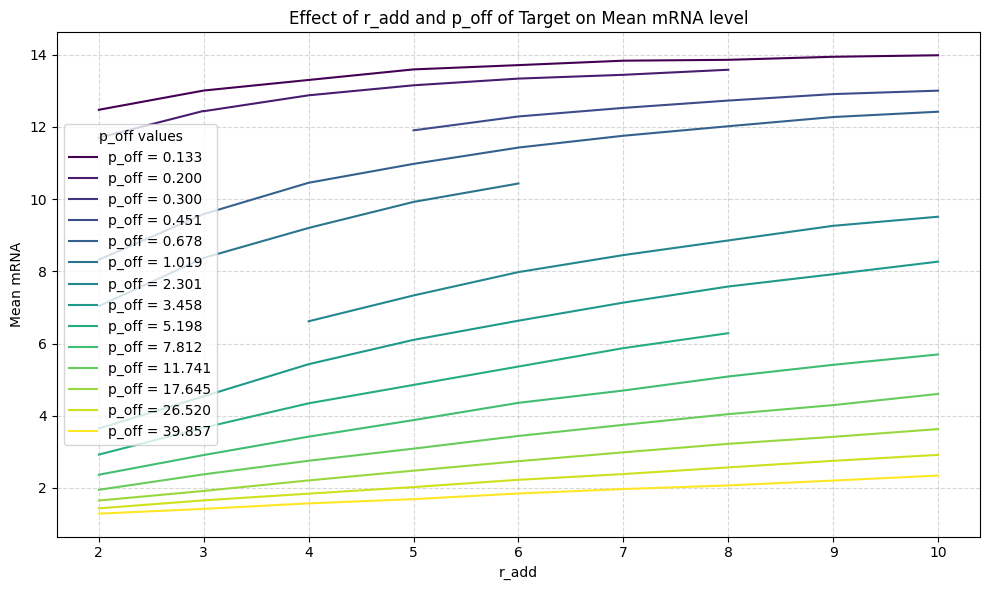

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = df_independent
# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique p_off values
k_on_values = np.sort(df['p_off'].unique())

# Pick 3 distinct colors manually
import matplotlib.cm as cm

# Pick 13 distinct colors from the Blues_r colormap
colors = [cm.viridis(i) for i in np.linspace(0, 1, len(k_on_values))]


# Plot each line with one of the 3 colors
for idx, k_on in enumerate(k_on_values):
    subset = df[df['p_off'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    mean_t1 = subset['mean_t2']
    
    ax.plot(subset['p_add_gene_1_to_gene_2'], mean_t1, 
            label=f'p_off = {k_on:.3f}', 
            color=colors[idx])
    print(f"Plotted line for p_off = {k_on:.3f}")

# Axis labels and title
ax.set_xlabel('r_add')
ax.set_ylabel('Mean mRNA')
ax.set_title('Effect of r_add and p_off of Target on Mean mRNA level')
ax.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='p_off values')
plt.tight_layout()
plt.show()


Plotted line for p_off = 0.133
Plotted line for p_off = 0.200
Plotted line for p_off = 0.300
Plotted line for p_off = 0.451
Plotted line for p_off = 0.678
Plotted line for p_off = 1.019
Plotted line for p_off = 2.301
Plotted line for p_off = 3.458
Plotted line for p_off = 5.198
Plotted line for p_off = 7.812
Plotted line for p_off = 11.741
Plotted line for p_off = 17.645
Plotted line for p_off = 26.520
Plotted line for p_off = 39.857


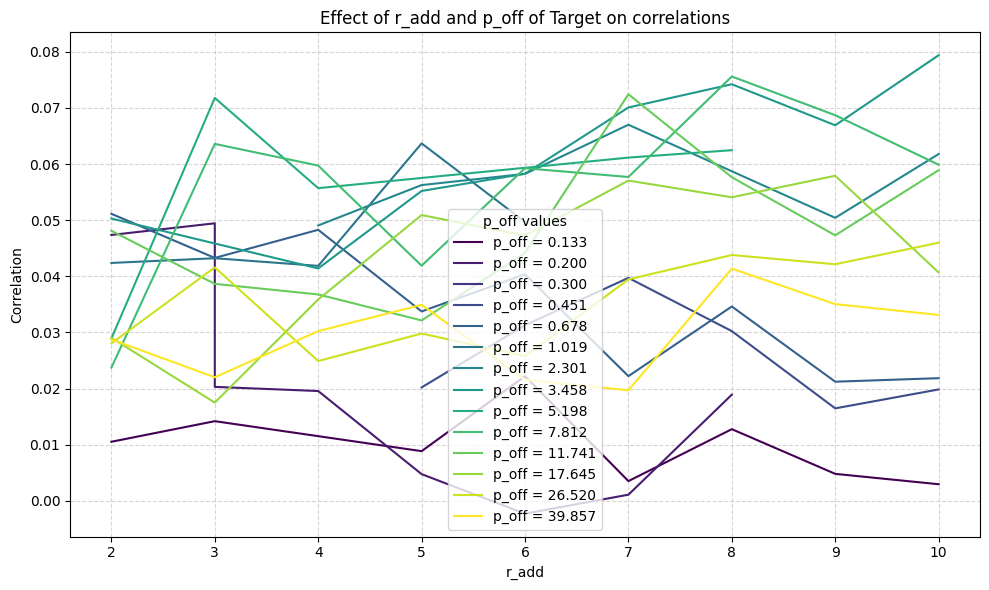

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = df_independent
# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique p_off values
k_on_values = np.sort(df['p_off'].unique())

# Pick 3 distinct colors manually
import matplotlib.cm as cm

# Pick 13 distinct colors from the Blues_r colormap
colors = [cm.viridis(i) for i in np.linspace(0, 1, len(k_on_values))]


# Plot each line with one of the 3 colors
for idx, k_on in enumerate(k_on_values):
    subset = df[df['p_off'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    corr_t2 = subset[5]
    
    ax.plot(subset['p_add_gene_1_to_gene_2'], corr_t2, 
            label=f'p_off = {k_on:.3f}', 
            color=colors[idx])
    print(f"Plotted line for p_off = {k_on:.3f}")

# Axis labels and title
ax.set_xlabel('r_add')
ax.set_ylabel('Correlation')
ax.set_title('Effect of r_add and p_off of Target on correlations')
ax.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='p_off values')
plt.tight_layout()
plt.show()


Plotted line for p_off = 0.133
Plotted line for p_off = 0.200
Plotted line for p_off = 0.300
Plotted line for p_off = 0.451
Plotted line for p_off = 0.678
Plotted line for p_off = 2.301
Plotted line for p_off = 3.458
Plotted line for p_off = 5.198
Plotted line for p_off = 7.812
Plotted line for p_off = 11.741
Plotted line for p_off = 17.645
Plotted line for p_off = 26.520
Plotted line for p_off = 39.857


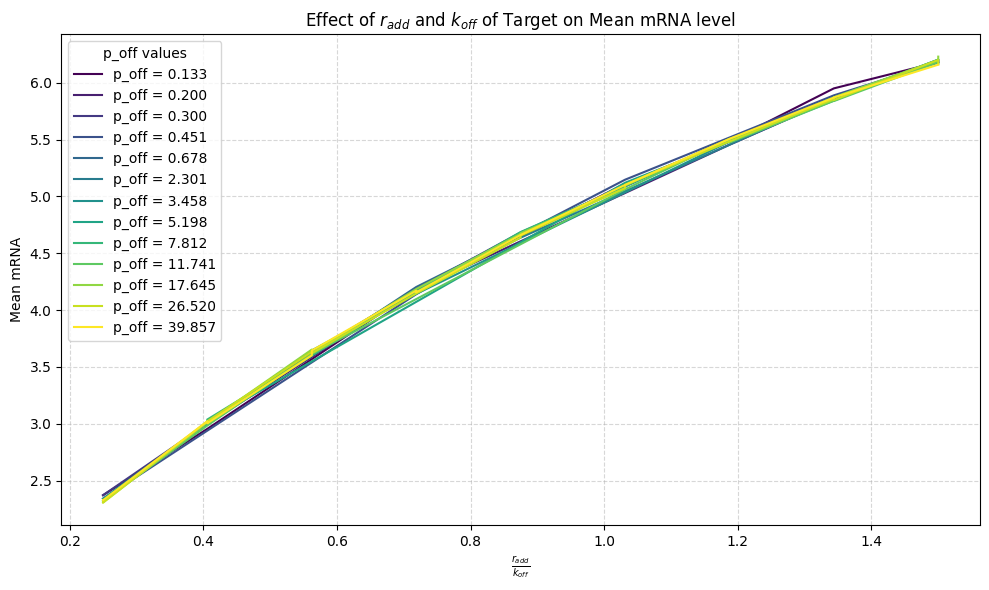

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = df_dependent
# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique p_off values
k_on_values = np.sort(df['p_off'].unique())

# Pick 3 distinct colors manually
import matplotlib.cm as cm

# Pick 13 distinct colors from the Blues_r colormap
colors = [cm.viridis(i) for i in np.linspace(0, 1, len(k_on_values))]


# Plot each line with one of the 3 colors
for idx, k_on in enumerate(k_on_values):
    subset = df[df['p_off'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    mean_t1 = subset['mean_t2']
    
    ax.plot(subset['p_add_gene_1_to_gene_2']/k_on, mean_t1, 
            label=f'p_off = {k_on:.3f}', 
            color=colors[idx])
    print(f"Plotted line for p_off = {k_on:.3f}")

# Axis labels and title
ax.set_xlabel(r'$\frac{r_{add}}{k_{off}}$')
ax.set_ylabel('Mean mRNA')
ax.set_title(r'Effect of $r_{add}$ and $k_{off}$ of Target on Mean mRNA level')
ax.grid(True, linestyle='--', alpha=0.5)
# plt.xscale('log')
plt.legend(title='p_off values')
plt.tight_layout()
plt.show()


Plotted line for p_off = 0.133
Plotted line for p_off = 0.200
Plotted line for p_off = 0.300
Plotted line for p_off = 0.451
Plotted line for p_off = 0.678
Plotted line for p_off = 2.301
Plotted line for p_off = 3.458
Plotted line for p_off = 5.198
Plotted line for p_off = 7.812
Plotted line for p_off = 11.741
Plotted line for p_off = 17.645
Plotted line for p_off = 26.520
Plotted line for p_off = 39.857


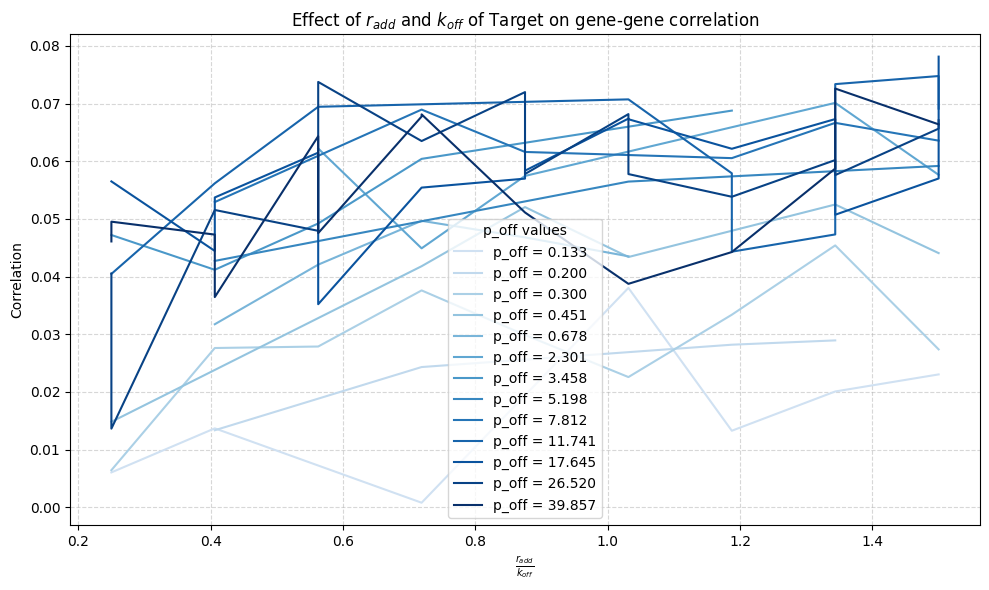

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = df_dependent
# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique p_off values
k_on_values = np.sort(df['p_off'].unique())

# Pick 3 distinct colors manually
import matplotlib.cm as cm

# Pick 13 distinct colors from the Blues_r colormap
colors = [cm.Blues(i) for i in np.linspace(0.2, 1, len(k_on_values))]


# Plot each line with one of the 3 colors
for idx, k_on in enumerate(k_on_values):
    subset = df[df['p_off'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    corr_t2 = subset[5]
    
    ax.plot(subset['p_add_gene_1_to_gene_2']/k_on, corr_t2, 
            label=f'p_off = {k_on:.3f}', 
            color=colors[idx])
    print(f"Plotted line for p_off = {k_on:.3f}")

# Axis labels and title
ax.set_xlabel(r'$\frac{r_{add}}{k_{off}}$')
ax.set_ylabel('Correlation')
ax.set_title(r'Effect of $r_{add}$ and $k_{off}$ of Target on gene-gene correlation')
ax.grid(True, linestyle='--', alpha=0.5)
# plt.xscale('log')
plt.legend(title='p_off values')
plt.tight_layout()
plt.show()


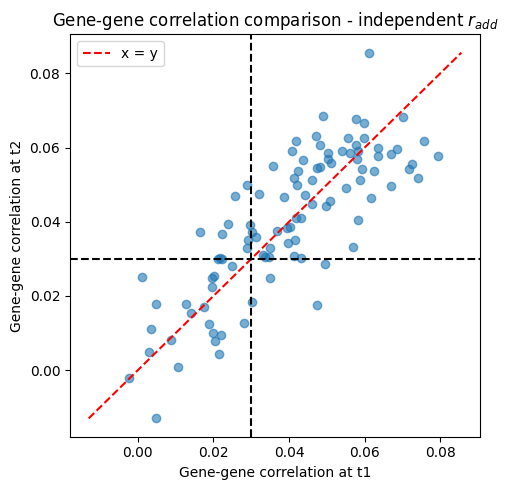

In [116]:
df = df_independent
plt.figure(figsize=(5, 5))
x_axis = df[5]
y_axis = df[10]
plt.scatter(x_axis, y_axis, alpha=0.6)

# Add x = y line
lims = [
    min(x_axis.min(),y_axis.min()),
    max(x_axis.max(), y_axis.max())
]
plt.plot(lims, lims, 'r--', label='x = y')
plt.axvline(0.03, linestyle = "--", color = "black")
plt.axhline(0.03,  linestyle = "--", color = "black")
# Labels and title
plt.xlabel("Gene-gene correlation at t1")
plt.ylabel("Gene-gene correlation at t2")
plt.title(r"Gene-gene correlation comparison - independent $r_{add}$")
plt.legend()
plt.tight_layout()
plt.show()

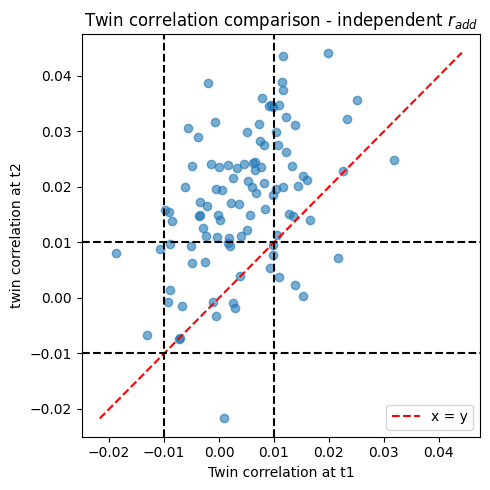

In [117]:
df = df_independent
plt.figure(figsize=(5, 5))
x_axis = df["twin_t1"]
y_axis = df["twin_t2"]
plt.scatter(x_axis, y_axis, alpha=0.6)

# Add x = y line
lims = [
    min(x_axis.min(),y_axis.min()),
    max(x_axis.max(), y_axis.max())
]
plt.plot(lims, lims, 'r--', label='x = y')
plt.axvline(0.01, linestyle = "--", color = "black")
plt.axhline(0.01,  linestyle = "--", color = "black")
plt.axvline(-0.01, linestyle = "--", color = "black")
plt.axhline(-0.01,  linestyle = "--", color = "black")
# Labels and title
plt.xlabel("Twin correlation at t1")
plt.ylabel("twin correlation at t2")
plt.title(r"Twin correlation comparison - independent $r_{add}$")
plt.legend()
plt.tight_layout()
plt.show()

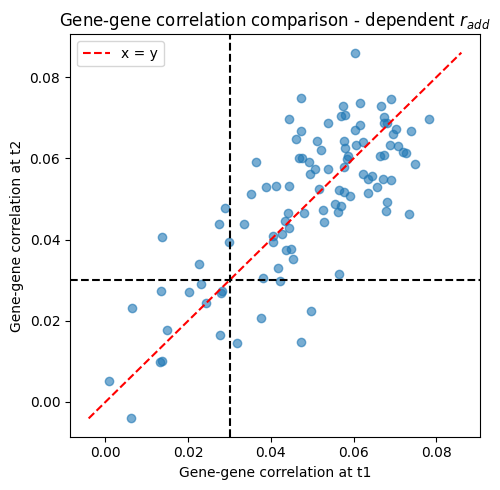

In [118]:
df = df_dependent
plt.figure(figsize=(5, 5))
x_axis = df[5]
y_axis = df[10]
plt.scatter(x_axis, y_axis, alpha=0.6)

# Add x = y line
lims = [
    min(x_axis.min(),y_axis.min()),
    max(x_axis.max(), y_axis.max())
]
plt.plot(lims, lims, 'r--', label='x = y')
plt.axvline(0.03, linestyle = "--", color = "black")
plt.axhline(0.03,  linestyle = "--", color = "black")
# Labels and title
plt.xlabel("Gene-gene correlation at t1")
plt.ylabel("Gene-gene correlation at t2")
plt.title(r"Gene-gene correlation comparison - dependent $r_{add}$")
plt.legend()
plt.tight_layout()
plt.show()

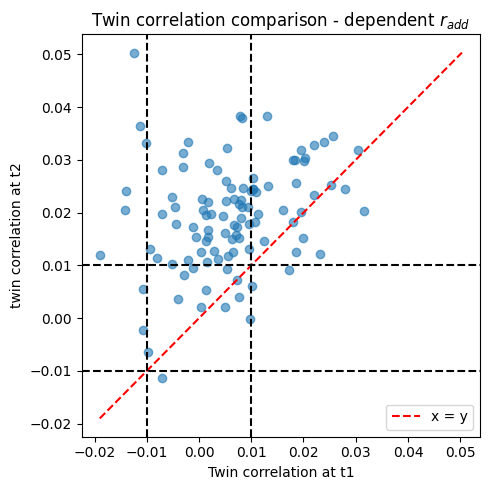

In [119]:
df = df_dependent
plt.figure(figsize=(5, 5))
x_axis = df["twin_t1"]
y_axis = df["twin_t2"]
plt.scatter(x_axis, y_axis, alpha=0.6)

# Add x = y line
lims = [
    min(x_axis.min(),y_axis.min()),
    max(x_axis.max(), y_axis.max())
]
plt.plot(lims, lims, 'r--', label='x = y')
plt.axvline(0.01, linestyle = "--", color = "black")
plt.axhline(0.01,  linestyle = "--", color = "black")
plt.axvline(-0.01, linestyle = "--", color = "black")
plt.axhline(-0.01,  linestyle = "--", color = "black")
# Labels and title
plt.xlabel("Twin correlation at t1")
plt.ylabel("twin correlation at t2")
plt.title(r"Twin correlation comparison - dependent $r_{add}$")
plt.legend()
plt.tight_layout()
plt.show()